# **Exploratory Data Analysis**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import plot_tree

In [2]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Printing the dataframe
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [10]:
# Accessing the first 5 observation units of the data set
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Examination of the size of the dataset.
df.shape

(768, 9)

In [12]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

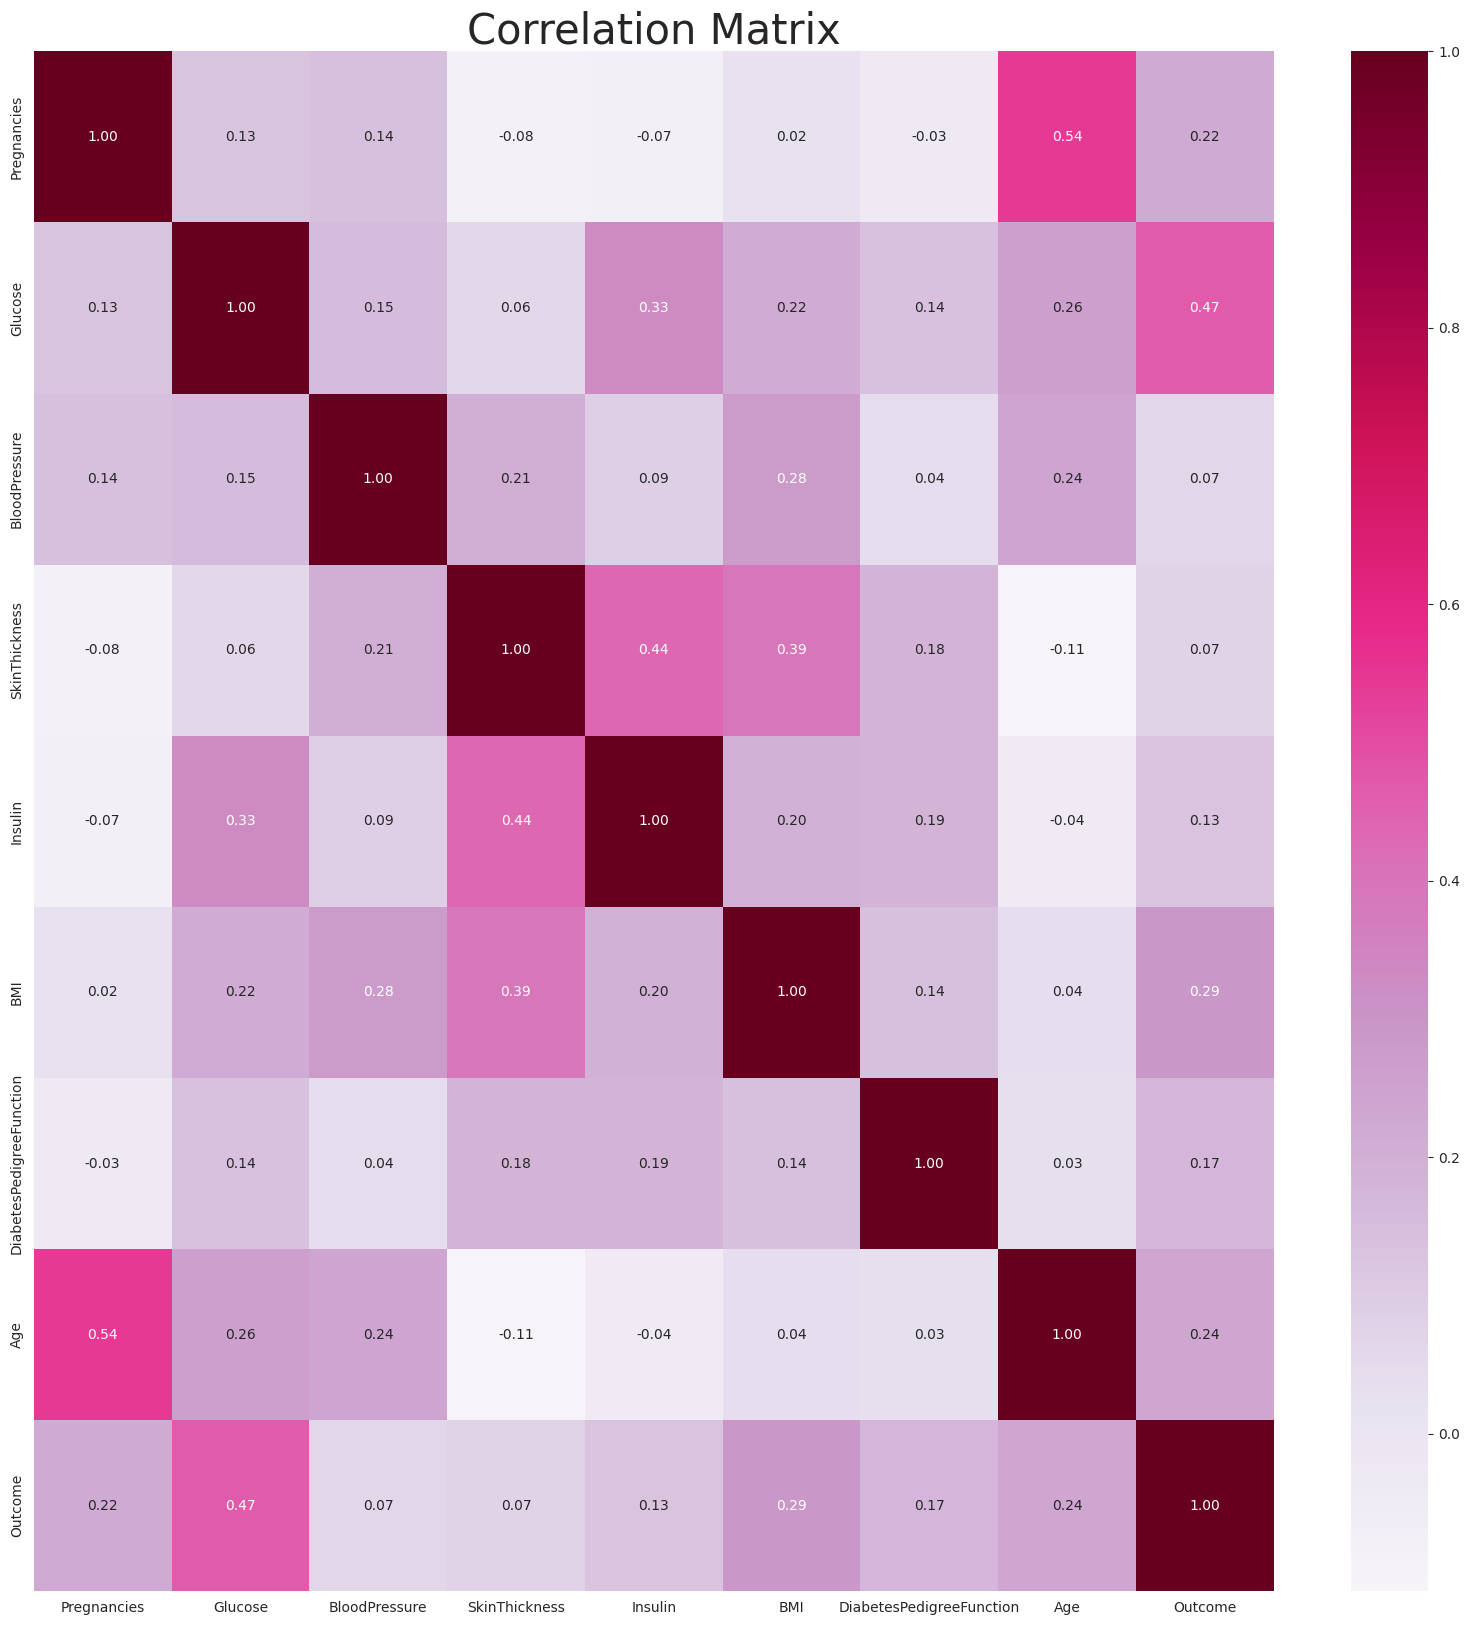

In [14]:
#Getting the Correlation Matrix
correlation_matrix=df.corr()
print(df.corr())
#Plotting the heatmap of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='PuRd')
plt.title('Correlation Matrix',fontsize=30)
plt.show()

In [16]:
# Selecting the desired columns-Pregnancies, BMI, Age, and Pregnancies for descriptive statistical analysis
selected_columns = ["Pregnancies", "BMI", "Age", "Glucose"]
selected_columns_descriptive_stats = df.describe().T.loc[selected_columns]
# Printing the descriptive statistics table
print(selected_columns_descriptive_stats)

             count        mean        std   min   25%    50%     75%    max
Pregnancies  768.0    3.845052   3.369578   0.0   1.0    3.0    6.00   17.0
BMI          768.0   31.992578   7.884160   0.0  27.3   32.0   36.60   67.1
Age          768.0   33.240885  11.760232  21.0  24.0   29.0   41.00   81.0
Glucose      768.0  120.894531  31.972618   0.0  99.0  117.0  140.25  199.0


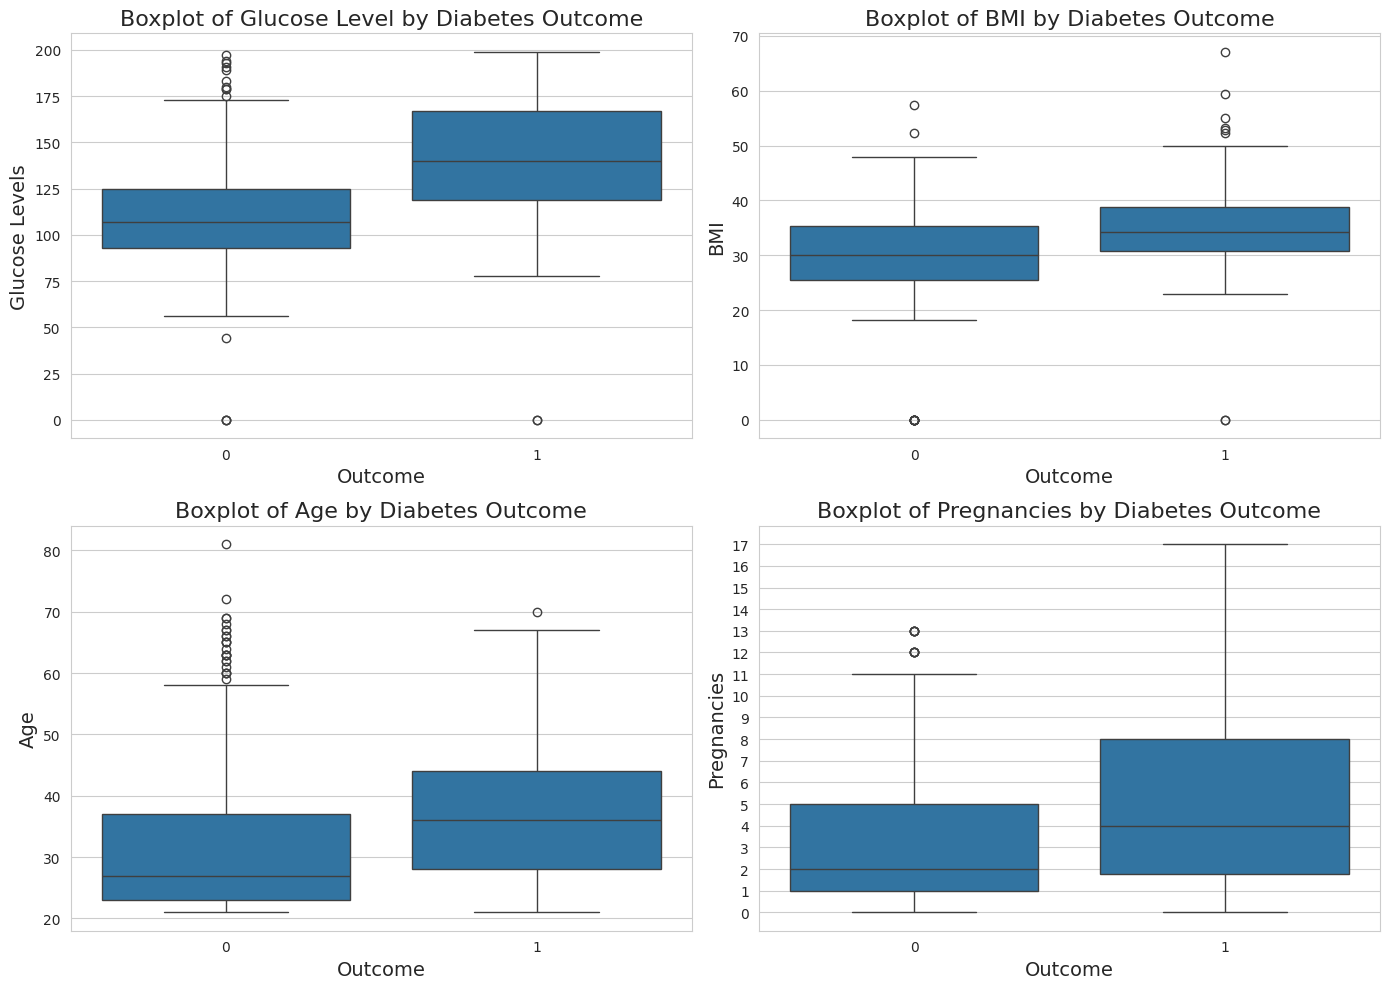

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.color_palette('Set2')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting boxplots for understanding data distribution of the factors concerned

sns.boxplot(x='Outcome', y='Glucose', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Glucose Level by Diabetes Outcome', fontsize=16)
axes[0, 0].set_xlabel("Outcome", fontsize=14)
axes[0, 0].set_ylabel("Glucose Levels", fontsize=14)

sns.boxplot(x='Outcome', y='BMI', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of BMI by Diabetes Outcome', fontsize=16)
axes[0, 1].set_xlabel("Outcome", fontsize=14)
axes[0, 1].set_ylabel("BMI", fontsize=14)

sns.boxplot(x='Outcome', y='Age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Age by Diabetes Outcome', fontsize=16)
axes[1, 0].set_xlabel("Outcome", fontsize=14)
axes[1, 0].set_ylabel("Age", fontsize=14)

sns.boxplot(x='Outcome', y='Pregnancies', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Pregnancies by Diabetes Outcome', fontsize=16)
axes[1, 1].set_xlabel("Outcome", fontsize=14)
axes[1, 1].set_ylabel("Pregnancies", fontsize=14)
axes[1, 1].set_yticks(range(0, int(df['Pregnancies'].max()) + 1))  # Adjust y-axis ticks to display whole numbers

plt.tight_layout()

# Display the plot
plt.show()


<ipython-input-18-3a593bc258b5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins=20, ax=ax[0, 0], color=palette[3])
<ipython-input-18-3a593bc258b5>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins=20, ax=ax[0, 1], color=palette[3])
<ipython-input-18-3a593bc258

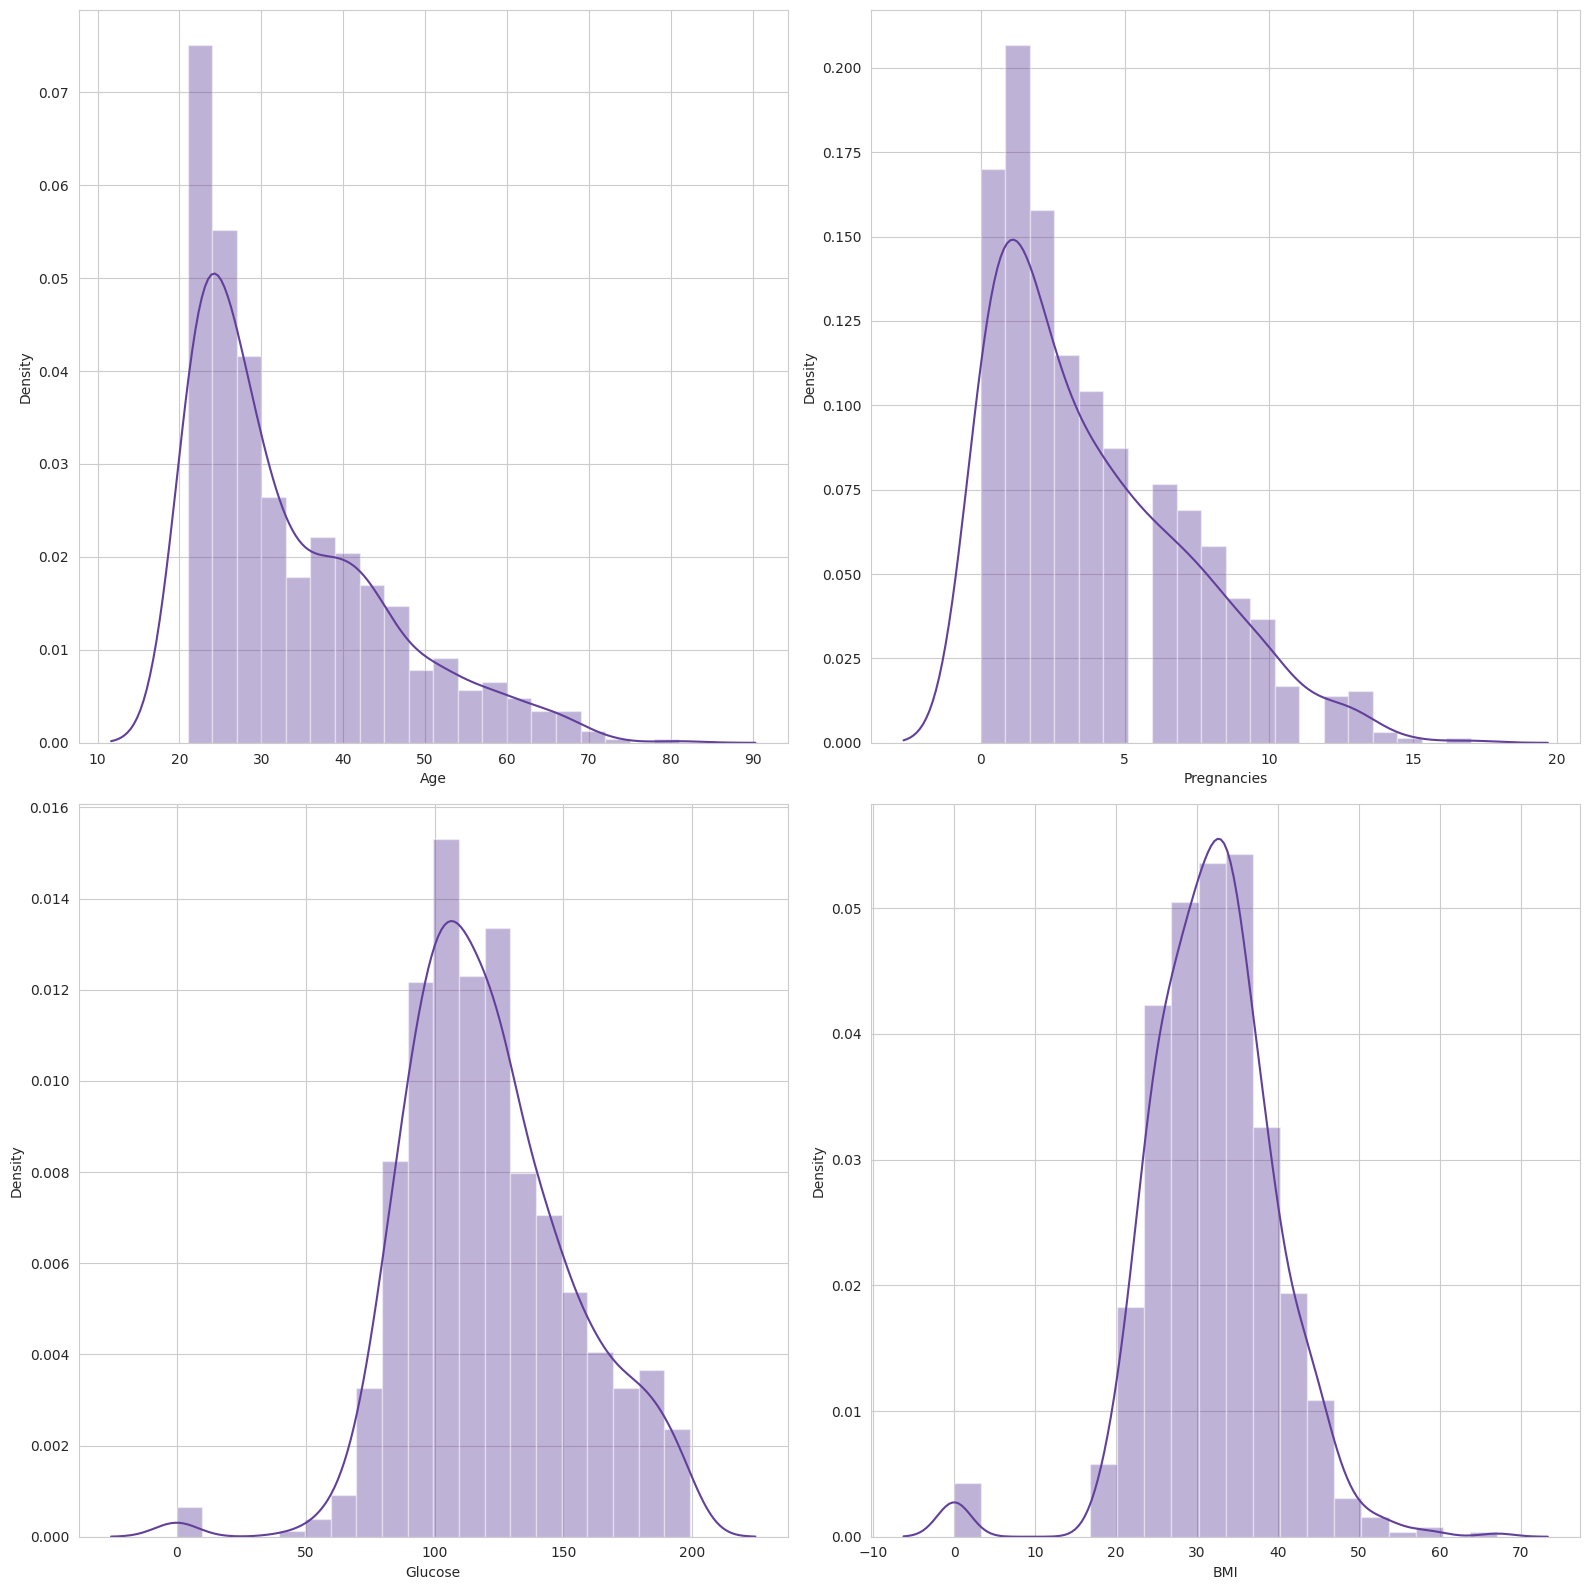

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creation of a 2x2 subplot grid with a specified figure size
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

palette = sns.color_palette("Purples", n_colors=4)  # Adjust n_colors as needed

# Plotting the distribution of 'Age' in the first subplot
sns.distplot(df.Age, bins=20, ax=ax[0, 0], color=palette[3])

# Plotting the distribution of 'Pregnancies' in the second subplot
sns.distplot(df.Pregnancies, bins=20, ax=ax[0, 1], color=palette[3])

# Plotting the distribution of 'Glucose' in the third subplot
sns.distplot(df.Glucose, bins=20, ax=ax[1, 0], color=palette[3])

# Plot the distribution of 'BMI' in the fourth subplot
sns.distplot(df.BMI, bins=20, ax=ax[1, 1], color=palette[3])

plt.tight_layout()

# Display the plot
plt.show()


In [19]:
# Examination of the proportion of diabetic and non-diabetic people in the data
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# **Treatment of Missing Values:**

It can be significantly noted from the data that the following column values cannot be zero:
1. Glucose
2. Insulin
3. Blood Pressure
4. BMI
5. SkinThickness

Therefore, we replace the 0's with NaN so that it will be easy to count missing values, and then we impute the missing values with appropriate values

In [20]:
# Replace zeros with NaN
df[['Glucose','Insulin','BMI','BloodPressure','SkinThickness']] = df[['Glucose','Insulin','BMI','BloodPressure','SkinThickness']].replace(0,np.NaN)

In [21]:
# Filling missing values in 'Glucose' column with the mean of non-missing values
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
#Filling missing values in 'Insulin' column with median of the non missing values
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
# Filling missing values in 'BloodPressure' column with the mean of non-missing values
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
#Filling missing values in 'BMI' column with median of the non missing values
df['BMI'].fillna(df['BMI'].median(),inplace=True)
#Filling missing values in 'SkinThickness' column with median of the non missing values
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)

In [22]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144.0,72.0,27.0,228.0,33.9,0.255,40,0
96,2,92.0,62.0,28.0,125.0,31.6,0.130,24,0
97,1,71.0,48.0,18.0,76.0,20.4,0.323,22,0
98,6,93.0,50.0,30.0,64.0,28.7,0.356,23,0


# **Feature Engineering**

In [23]:
# Create a new column 'Nutritional_Status' with initial value 'Normal range'
df['Nutritional_Status'] = 'Normal range'

# Assign categories based on BMI ranges using if-else conditions
for index, row in df.iterrows():
    if row['BMI'] < 18.5:
        df.at[index, 'Nutritional_Status'] = 'Underweight'
    elif 18.5 <= row['BMI'] <= 22.9:
        df.at[index, 'Nutritional_Status'] = 'Normal range'
    elif 23 <= row['BMI'] <= 24.9:
        df.at[index, 'Nutritional_Status'] = 'Overweight'
    elif 25 <= row['BMI'] <= 29.9:
        df.at[index, 'Nutritional_Status'] = 'Obese I'
    elif row['BMI'] > 30:
        df.at[index, 'Nutritional_Status'] = 'Obese II'

# Perform one-hot encoding on the 'Nutritional_Status' column
df = pd.get_dummies(df, columns=['Nutritional_Status'], drop_first=True)


# **Random Forest Algorithm**

In [24]:
# Assuming 'Outcome' is the target variable
X_rf = df[['Pregnancies', 'BMI', 'Age']]
y_rf = df['Outcome']
# Split the dataset into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=0)
# Standardize the features using StandardScaler
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)

Accuracy on Training Set: 0.995114006514658
Accuracy on Test Set: 0.7207792207792207

Confusion Matrix:
[[88 19]
 [24 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.55      0.49      0.52        47

    accuracy                           0.72       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.71      0.72      0.72       154



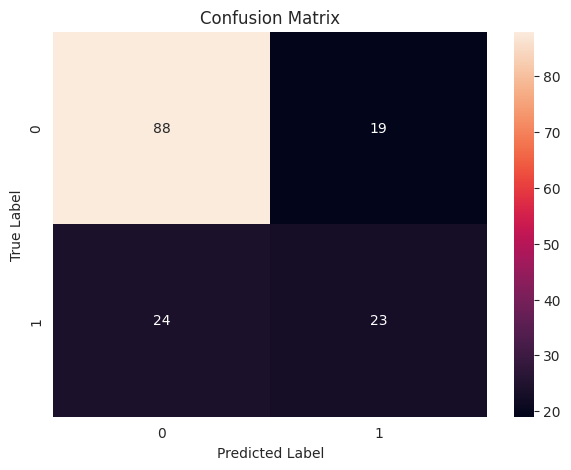

In [25]:
# Initialization and training of Random Forest classifier with 200 estimators
random_forest_classifier = RandomForestClassifier(n_estimators=100)
# Training the Random Forest classifier on the training data
random_forest_classifier.fit(X_train_rf, y_train_rf)
# Predict on the training data
rfc_train_predictions = random_forest_classifier.predict(X_train_rf)
rfc_train_probabilities = random_forest_classifier.predict_proba(X_train_rf)
# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_rf, rfc_train_predictions)
print("Accuracy on Training Set:", train_accuracy)
# Getting the accuracy score for Random Forest on the test set
rfc_predictions = random_forest_classifier.predict(X_test_rf)
rfc_probabilities = random_forest_classifier.predict_proba(X_test_rf)
test_accuracy = accuracy_score(y_test_rf, rfc_predictions)
print("Accuracy on Test Set:", test_accuracy)
# Printing the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, rfc_predictions))
# Printing the classification report
print("\nClassification Report:")
print(classification_report(y_test_rf, rfc_predictions))
# Plotting the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test_rf, rfc_predictions), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Hyper-Parameter Tuning**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],   # Number of trees in the forest
    'max_depth': [5, 10, 15, 20],           # Maximum depth of the trees
    'min_samples_split': [2, 3, 4, 5],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4]        # Minimum number of samples required to be at a leaf node
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')

# Fitting the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

# Printing the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Getting the best estimator
best_rf_classifier = grid_search.best_estimator_

# Making prediction on the test set using the best estimator
best_predictions = best_rf_classifier.predict(X_test_rf)

# Calculation of accuracy on the test set
best_accuracy = accuracy_score(y_test_rf, best_predictions)
print("Accuracy on Test Set (After Hyperparameter Tuning):", best_accuracy)

# Printing the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, best_predictions))

# Printing the classification report
print("\nClassification Report:")
print(classification_report(y_test_rf, best_predictions))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set (After Hyperparameter Tuning): 0.7337662337662337

Confusion Matrix:
[[90 17]
 [24 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.57      0.49      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154



In [27]:
import pickle
# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_rf_classifier, f)
